In [1]:
import os
import random
from shutil import copyfile


In [2]:
data_dir = "C:\AIproject\Gesture Image Pre-Processed Data"
train_dir = "C:\AIproject\Gesture Image Data/train"
validation_dir = "C:\AIproject\Gesture Image Data/validation"
test_dir = "C:\AIproject\Gesture Image Data/test"
train_ratio = 0.8  # 80% training
validation_ratio = 0.1  # 10% validation
test_ratio = 0.1  # 10% testing


<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_14088\1879822985.py:1: SyntaxWarning: invalid escape sequence '\A'
  data_dir = "C:\AIproject\Gesture Image Pre-Processed Data"
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_14088\1879822985.py:2: SyntaxWarning: invalid escape sequence '\A'
  train_dir = "C:\AIproject\Gesture Image Data/train"
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_14088\1879822985.py:3: SyntaxWarning: invalid escape sequence '\A'
  validation_dir = "C:\AIproject\Gesture Image Data/validation"
C:\Users\Abdul Rehman\AppData\Local\Temp\ipykernel_14088\1879822985

In [3]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [4]:
# List all subdirectories (gesture classes)
gesture_classes = os.listdir(data_dir)

for gesture_class in gesture_classes:
    class_dir = os.path.join(data_dir, gesture_class)
    if not os.path.isdir(class_dir):
        continue  # Skip if not a directory
    
    # List all image files in the current class directory
    images = os.listdir(class_dir)
    num_images = len(images)
    
    # Shuffle the list of images
    random.shuffle(images)
    
    # Split images into training, validation, and testing sets
    num_train = int(num_images * train_ratio)
    num_validation = int(num_images * validation_ratio)
    
    train_images = images[:num_train]
    validation_images = images[num_train:num_train + num_validation]
    test_images = images[num_train + num_validation:]
    
    # Copy images to train, validation, and test directories
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_dir, gesture_class, img)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        copyfile(src, dst)
    
    for img in validation_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(validation_dir, gesture_class, img)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        copyfile(src, dst)
    
    for img in test_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(test_dir, gesture_class, img)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        copyfile(src, dst)


In [5]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np

In [7]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"C:\AIproject\Gesture Image Data\train", target_size=(224, 224))

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"C:\AIproject\Gesture Image Data\validation", target_size=(224, 224))


Found 44400 images belonging to 37 classes.
Found 5550 images belonging to 37 classes.


In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

c:\Users\Abdul Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=37, activation="softmax"))

In [10]:
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.001

# Initialize the Adam optimizer with the specified learning rate
opt = Adam(learning_rate=learning_rate)

# Compile your model using the initialized optimizer and loss function
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 37)             │       151,589 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,412,133 (512.74 MB)

 Trainable params: 134,412,133 (512.74 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the directory path where you want to save the model files
save_dir = "C:/AIproject"

# ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    filepath=os.path.join(save_dir, "vgg16_1.keras"),  # Updated filepath with .keras extension
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    mode='max'
)


In [14]:
history = model.fit(
    x=traindata,                    # Training data generator (e.g., traindata)
    steps_per_epoch=100,            # Number of steps (batches) per epoch
    epochs=100,                      # Number of epochs
    validation_data=testdata,       # Validation data generator (e.g., testdata)
    validation_steps=10,            # Number of validation steps per epoch
    callbacks=[checkpoint, early]   # List of callbacks to apply during training
)

Epoch 1/100


c:\Users\Abdul Rehman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 61s/step - accuracy: 0.2852 - loss: 863.3463  
Epoch 1: val_accuracy improved from -inf to 0.93125, saving model to C:/AIproject\vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 6280s 63s/step - accuracy: 0.2880 - loss: 856.8489 - val_accuracy: 0.9312 - val_loss: 0.2622
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 62s/step - accuracy: 0.9446 - loss: 0.2010  
Epoch 2: val_accuracy improved from 0.93125 to 0.94687, saving model to C:/AIproject\vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 6315s 63s/step - accuracy: 0.9446 - loss: 0.2008 - val_accuracy: 0.9469 - val_loss: 0.1661
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 63s/step - accuracy: 0.9584 - loss: 0.1420  
Epoch 3: val_accuracy did not improve from 0.94687
100/100 ━━━━━━━━━━━━━━━━━━━━ 6457s 65s/step - accuracy: 0.9584 - loss: 0.1421 - val_accuracy: 0.9187 - val_loss: 0.2133
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 63s/step - accuracy: 0.9731 - loss: 0.1201  
Epoch 4: val_accuracy improved from 0.94687 to

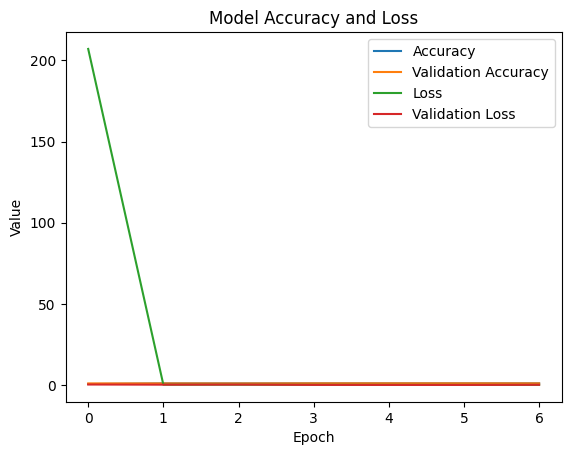

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])  # Change "acc" to "accuracy"
plt.plot(history.history['val_accuracy'])  # Change "val_acc" to "val_accuracy"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy and Loss")
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


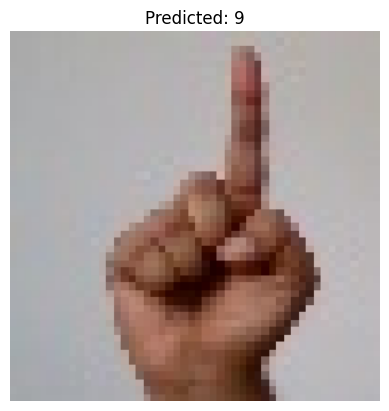

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Define the directory where the model file is saved
save_dir = "C:/AIproject"

# Load the saved model
model_path = os.path.join(save_dir, "vgg16_1.keras")
saved_model = load_model(model_path)

# Load and preprocess the image for prediction
img_path = r"C:\AIproject\Gesture Image Data\D\1.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Perform prediction using the loaded model
predictions = saved_model.predict(img_array)

# Define class labels (replace with your own label names)
class_labels = [ 'unko', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X','Y','Z' ]

# Map predicted probabilities to labels
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]

# Display the image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
